In [ ]:
from google.colab import files
auto = files.upload()

Saving Electric_Vehicle_Population_Data.csv to Electric_Vehicle_Population_Data (1).csv


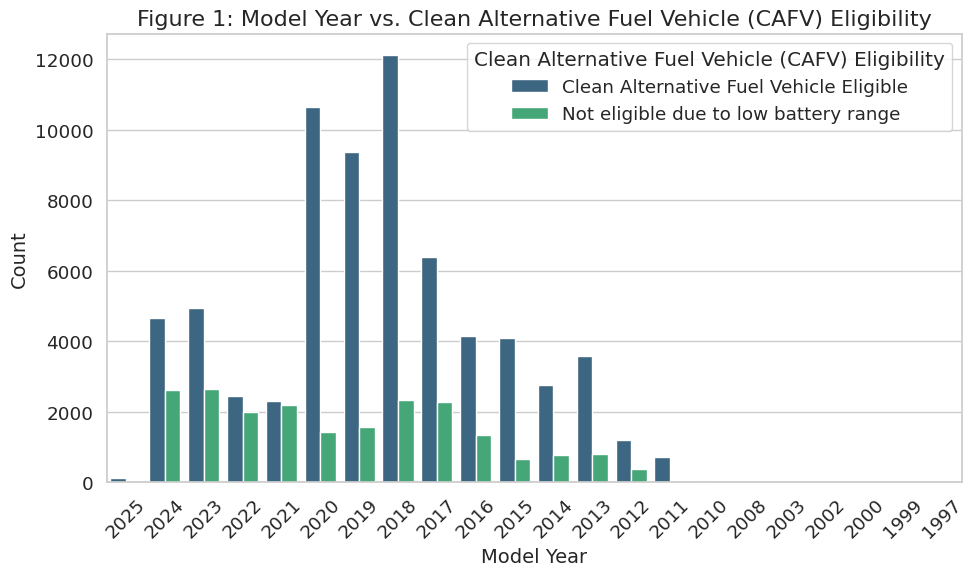

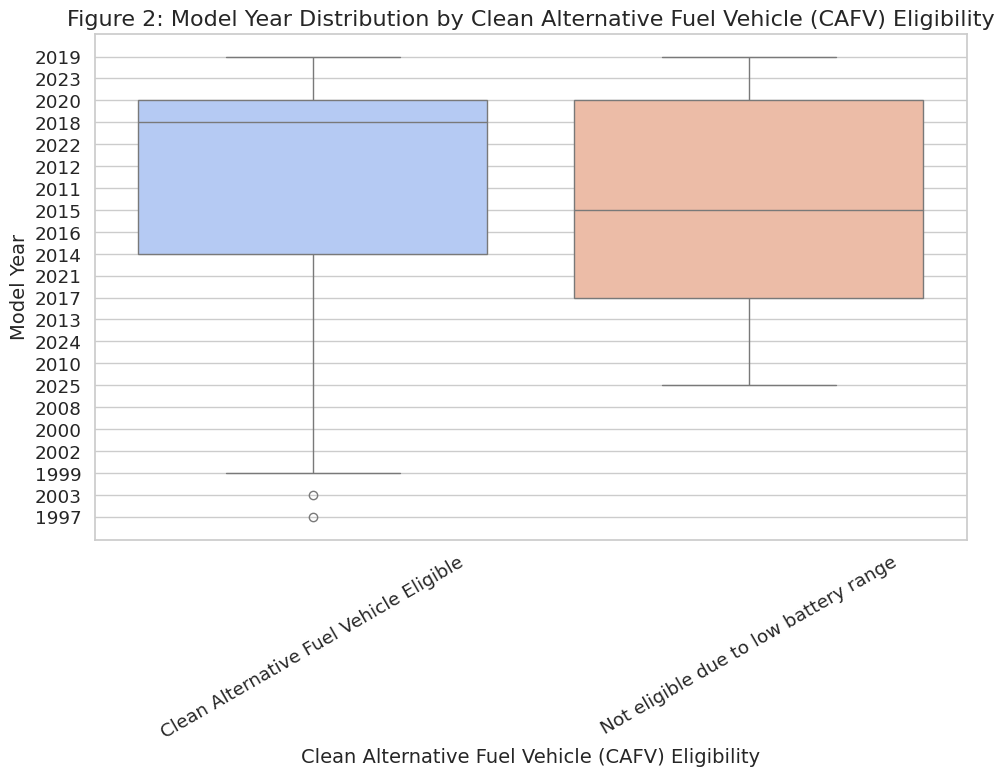

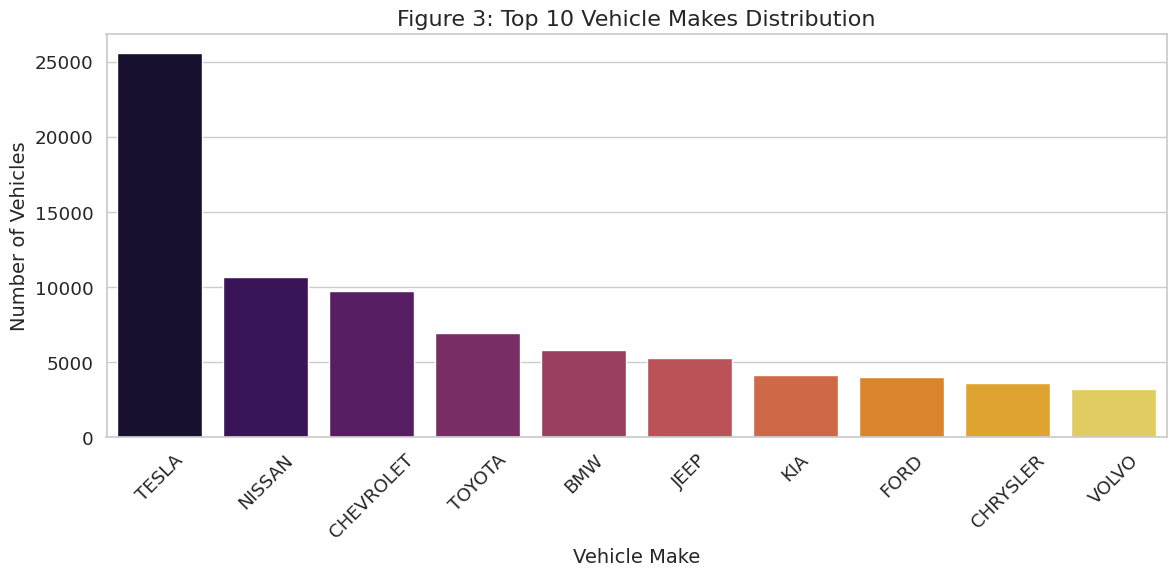

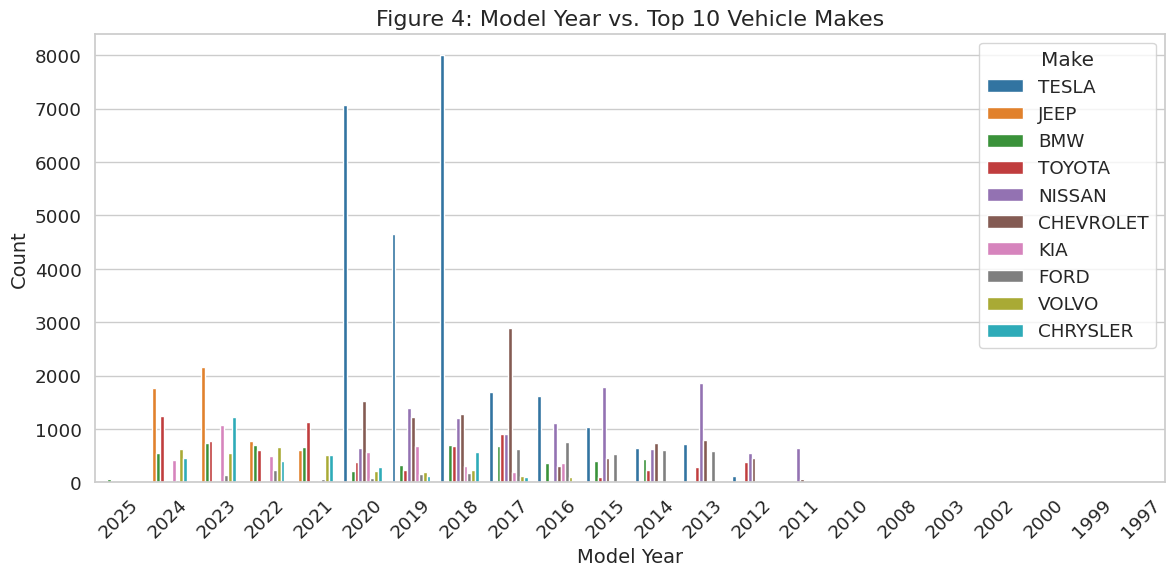

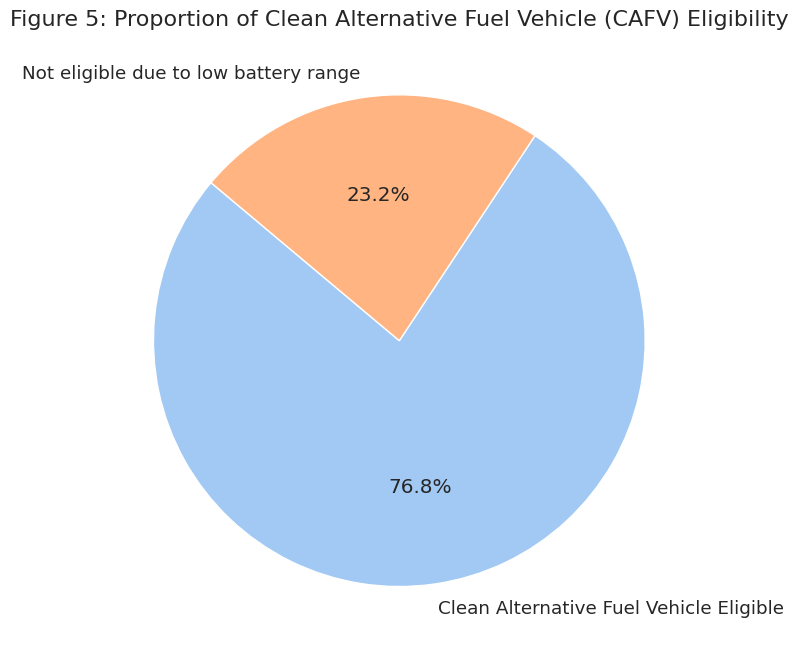

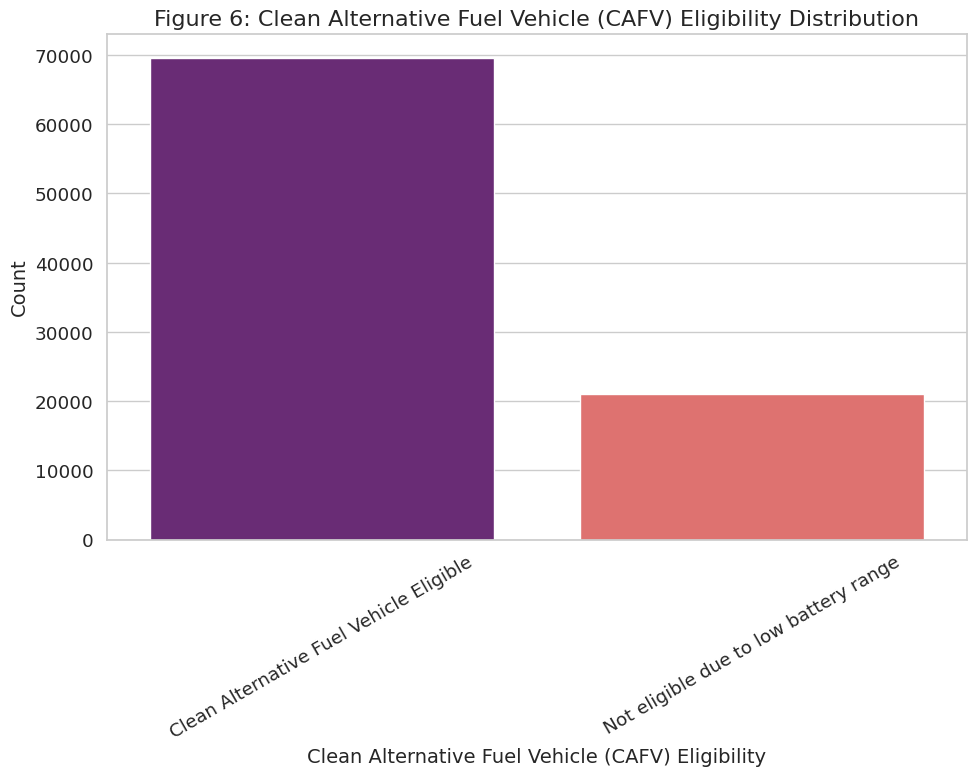

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

def load_and_preprocess_data():
    """
    Load data from the already uploaded file, handle missing values, and apply preprocessing.
    """
    filename = 'Electric_Vehicle_Population_Data.csv'
    data = pd.read_csv(filename)
    data = data[['Make', 'Model', 'Model Year', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']].copy()
    data = data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Eligibility unknown as battery range has not been researched']
    data.dropna(inplace=True)
    return data.astype(str)

def create_graphics(data):
    """
    Create scatterplots and histograms showcasing initial findings on the data.
    """
    # Setting seaborn style
    sns.set(style="whitegrid", font_scale=1.2)

    # Figure 1: Scatterplot - Model Year vs Electric Vehicle Type (Proportion)
    sorted_years = sorted(data['Model Year'].unique(), reverse=True)
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Model Year', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=data, palette='viridis', order=sorted_years)
    plt.title('Figure 1: Model Year vs. Clean Alternative Fuel Vehicle (CAFV) Eligibility', fontsize=16)
    plt.xlabel('Model Year', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Figure 2: Boxplot - Model Year Distribution by Electric Vehicle Type
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y='Model Year', data=data, palette='coolwarm')
    plt.title('Figure 2: Model Year Distribution by Clean Alternative Fuel Vehicle (CAFV) Eligibility', fontsize=16)
    plt.xlabel('Clean Alternative Fuel Vehicle (CAFV) Eligibility', fontsize=14)
    plt.ylabel('Model Year', fontsize=14)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()




def create_additional_graphics(data):
    """
    Create additional visualizations showcasing more insights into the data.
    """
    # Figure 3: Histogram - Distribution of Vehicles by Make
    plt.figure(figsize=(12, 6))
    make_counts = data['Make'].value_counts().head(10)  # Taking top 10 makes for clarity
    sns.barplot(x=make_counts.index, y=make_counts.values, palette='inferno')
    plt.title('Figure 3: Top 10 Vehicle Makes Distribution', fontsize=16)
    plt.xlabel('Vehicle Make', fontsize=14)
    plt.ylabel('Number of Vehicles', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Figure 4: Scatterplot - Model Year vs Make (Top 10 Makes)
    sorted_years = sorted(data['Model Year'].unique(), reverse=True)
    plt.figure(figsize=(12, 6))
    top_makes = data['Make'].value_counts().head(10).index
    filtered_data = data[data['Make'].isin(top_makes)]
    sns.countplot(x='Model Year', hue='Make', data=filtered_data, palette='tab10', order=sorted_years)
    plt.title('Figure 4: Model Year vs. Top 10 Vehicle Makes', fontsize=16)
    plt.xlabel('Model Year', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Figure 5: Pie chart - Proportion of Electric Vehicle Types
    plt.figure(figsize=(8, 8))
    type_counts = data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
    plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Figure 5: Proportion of Clean Alternative Fuel Vehicle (CAFV) Eligibility', fontsize=16)
    plt.tight_layout()
    plt.show()


    # Figure 6: Histogram - Electric Vehicle Type Distribution
    plt.figure(figsize=(10, 8))
    sns.countplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=data, palette='magma')
    plt.title('Figure 6: Clean Alternative Fuel Vehicle (CAFV) Eligibility Distribution', fontsize=16)
    plt.xlabel('Clean Alternative Fuel Vehicle (CAFV) Eligibility', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

def main():
    # Load and preprocess the data
    data = load_and_preprocess_data()
    if data is None:
        return

    # Create graphics showcasing initial findings
    create_graphics(data)

    # Create additional graphics showcasing more insights
    create_additional_graphics(data)

# Run the main program
if __name__ == "__main__":
    main()

